# 5.2-小数据集训练CNN（3）
## 基准组实验条件
### 数据集：小数据集
### 训练集：1,000/类别
### 验证集：500/类别
### 测试集：500/类别
### 是否使用数据增强：是（训练集/验证集同时使用数据增强）
### 训练轮数：30
### 可参考教材pp111-115

## 1 建模，构建卷积神经网络
### 与基准组完全一致

In [ ]:
from keras import models
from keras import layers

#conv2D的filters从32增加到128
my_network = models.Sequential()
#32个filter
my_network.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
my_network.add(layers.MaxPooling2D((2,2)))
#64个filter
my_network.add(layers.Conv2D(64,(3,3),activation = 'relu'))
my_network.add(layers.MaxPooling2D((2,2)))
#128个filter
my_network.add(layers.Conv2D(128,(3,3),activation = 'relu'))
my_network.add(layers.MaxPooling2D((2,2)))
#128个filter
my_network.add(layers.Conv2D(128,(3,3),activation = 'relu'))
my_network.add(layers.MaxPooling2D((2,2)))

my_network.add(layers.Flatten()) #将3D展平为1D
#为防止过拟合，使用dropout
#my_network.add(layers.Dropout(0.5))
my_network.add(layers.Dense(512, activation = 'relu'))
my_network.add(layers.Dense(1,activation='sigmoid'))#最后输出二元分类概率

In [ ]:
from keras import optimizers
my_network.compile(optimizer = optimizers.RMSprop(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['acc'])

## 2 加数，加载数据并对图像预处理
### 【注意】训练集与验证集需同时使用数据增强

#### rotation_range：图像随机旋转角度
#### width_shift/height_shift：是图像在水平和垂直方向上的平移范围
#### shear_range：是随机错切变换角度
#### zoom_range：是图像随机缩放范围
#### horizontal_flip：水平翻转
#### fill_mode：填充新创建的像素

### 2.1 创建图片变换生成器实例，并定义图片变换规则

In [3]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [9]:
#训练集做数据增强处理
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')


#特别注意！！在这里为验证集创建的图片生成器实例也要应用数据增强技术
#test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')


Found 2000 images belonging to 2 classes.


### 2.2 对指定目录下的图片集应用图片变换生成器

In [ ]:
#对指定目录下的训练集图片数据执行相应变换
train_dir = 'E:/0-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/train'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary')


#对指定目录下的验证集图片数据执行相应变换
validation_dir = 'E:/0-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/validation'

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary')

## 3  训练，用fit_generator训练数据

In [13]:
history_data_arg = my_network.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 33s 329ms/step - loss: 0.6912 - acc: 0.5389 - val_loss: 0.6537 - val_acc: 0.5178
Epoch 2/30
100/100 [==============================] - 30s 298ms/step - loss: 0.6713 - acc: 0.5874 - val_loss: 0.6892 - val_acc: 0.5915
Epoch 3/30
100/100 [==============================] - 30s 299ms/step - loss: 0.6459 - acc: 0.6278 - val_loss: 0.6199 - val_acc: 0.5666
Epoch 4/30
100/100 [==============================] - 30s 303ms/step - loss: 0.6305 - acc: 0.6329 - val_loss: 0.5787 - val_acc: 0.6540
Epoch 5/30
100/100 [==============================] - 30s 302ms/step - loss: 0.6096 - acc: 0.6643 - val_loss: 0.6790 - val_acc: 0.6846
Epoch 6/30
100/100 [==============================] - 34s 335ms/step - loss: 0.5980 - acc: 0.6784 - val_loss: 0.5627 - val_acc: 0.6611
Epoch 7/30
100/100 [==============================] - 30s 303ms/step - loss: 0.5859 - acc: 0.6872 - val_loss: 0.5759 - val_acc: 0.6878
Epoch 8/30
100/100 [==============================] - 3

In [14]:
my_network.save('E:/0-AI读书学习笔记/0-python深度学习/0-model_repo/cats_and_dogs_small_my_network_with_DR_also_DR_in_validation.h5')

## 4 评估模型 
### 4.1 参考训练数据预处理方法，定义测试集图片文件预处理函数
#### step 1:读取图像
#### step 2:将JPG文件解码为RGB像素网络
#### step 3:将像素网络转换为浮点张量
#### step 4:将[0,255]的像素值缩放到[0,1]

In [1]:
import numpy as np
def preprocess_img(img):
    x1 = image.img_to_array(img)
    x2 = x1 * 1./255
    x3 = np.expand_dims(x2, axis = 0)
    return x3

### 4.2 评估模型在训练集/验证集损失函数变化趋势

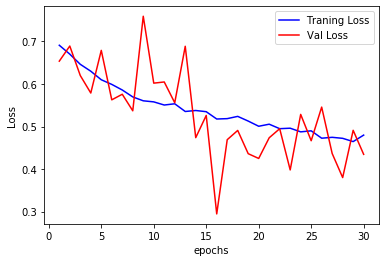

In [24]:
#import matplotlib.pyplot as plt

train_loss = history_data_arg.history['loss']
val_loss = history_data_arg.history['val_loss']

epochs = range(1, len(train_loss)+1)

plt.plot(epochs, train_loss, 'b', label = 'Traning Loss')
plt.plot(epochs, val_loss, 'r', label = 'Val Loss')

plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

### 由上图，模型______

### 4.3 评估模型在训练集/验证集分类准确率变化趋势

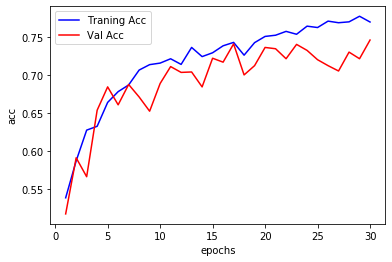

In [25]:
train_acc = history_data_arg.history['acc']
val_acc = history_data_arg.history['val_acc']

plt.plot(epochs, train_acc, 'b', label = 'Traning Acc')
plt.plot(epochs, val_acc, 'r', label = 'Val Acc')

plt.xlabel('epochs')
plt.ylabel('acc')

plt.legend()
plt.show()

### 由上图，模型在_______

### 4.4 评估模型在测试集上的表现

In [26]:
import os
from keras.preprocessing import image

classes = ['cats','dogs']
files_name = []
test_true_labels = []
test_pred_labels = []
test_pred_probs = []

for c in classes:
    test_class_dir = 'E:/0-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/test/{}'.format(c)
    for f in os.listdir(test_class_dir):
        
        files_name.append(f)
        test_true_labels.append(f[0:3])
        
        img_path = os.path.join(test_class_dir, f)
        img = image.load_img(img_path, target_size = (150, 150))
        pred = my_network.predict(preprocess_img(img))
        test_pred_probs.append(pred)
        
        pred_label = None
        if pred[0] > 0.5:
            pred_label = 'dog'
        else:
            pred_label = 'cat'
        test_pred_labels.append(pred_label)
        


import pandas as pd
df = pd.DataFrame(data={'file':files_name, 'true_label':test_true_labels,  'pred_label':test_pred_labels, 'pred_prob':test_pred_probs})

    
pred_correct_records = df[df['true_label'] == df['pred_label']].shape[0]
correct_rate = float(pred_correct_records)/float(1000)
correct_rate  

### 该模型在测试集上的分类准确率为___